# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy


In [8]:
import random
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl

from citipy import citipy
from pprint import pprint

from api_keys import weather_api_key

import numpy as np

In [13]:
cities_list = pd.read_csv("../output_data/cities.csv",encoding='utf-8', keep_default_na=False)

cities_list = cities_list[['City','Country']]

cities_list.columns = ['city_name', 'country_code']

cities_list.head(10)

,city_name,country_code
0,ostrovnoy,RU
1,mahebourg,MU
2,qaanaaq,GL
3,zhuhai,CN
4,cape town,ZA
5,atuona,PF
6,flinders,AU
7,opuwo,NA
8,tiksi,RU
9,pushkinskiye gory,RU


In [15]:
cities_list.count()

city_name       548
country_code    548
dtype: int64

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [47]:
city_name =[]
lon_api_list = []
lat_api_list = []
temp_list = []
humidity_list = []
wind_list = []
clouds = []
country_api = []
date = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        lat_api_list.append(response['coord']['lat'])
        lon_api_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        wind_list.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country_api.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(f"processing cityname:{city}")
    except:
        print(f'City not found skipping') 
    

processing cityname:kruisfontein
processing cityname:palenque
processing cityname:mackay
processing cityname:krasnoselkup
City not found skipping
processing cityname:camana
processing cityname:axim
processing cityname:albany
processing cityname:kudahuvadhoo
processing cityname:tosya
processing cityname:victor harbor
City not found skipping
processing cityname:mataura
processing cityname:norman wells
processing cityname:port elizabeth
processing cityname:makakilo city
City not found skipping
processing cityname:mahebourg
processing cityname:sitka
processing cityname:kapaa
processing cityname:punta arenas
processing cityname:rikitea
processing cityname:ushuaia
processing cityname:takoradi
processing cityname:bassar
processing cityname:new norfolk
processing cityname:hobart
processing cityname:saint george
processing cityname:gualeguay
processing cityname:saskylakh
processing cityname:bredasdorp
City not found skipping
processing cityname:matay
processing cityname:lom sak
processing cityn

City not found skipping
processing cityname:boke
processing cityname:guerrero negro
processing cityname:palmerston
processing cityname:mizan teferi
processing cityname:mayahi
processing cityname:manaus
processing cityname:nome
processing cityname:tabou
processing cityname:ahipara
processing cityname:flinders
processing cityname:la ronge
processing cityname:kaitangata
processing cityname:tsogni
processing cityname:plettenberg bay
processing cityname:el dorado
processing cityname:manta
processing cityname:sale
processing cityname:sagar
processing cityname:qidong
processing cityname:port moresby
City not found skipping
processing cityname:tolmin
processing cityname:ercis
processing cityname:spasskoye
processing cityname:the pas
processing cityname:vostok
processing cityname:dzhebariki-khaya
processing cityname:college
processing cityname:lavrentiya
processing cityname:marsh harbour
processing cityname:fort nelson
processing cityname:wahiawa
processing cityname:buraydah
processing cityname

processing cityname:suntar
processing cityname:xining
processing cityname:tura
City not found skipping
processing cityname:lata
processing cityname:villa bruzual
processing cityname:quatre cocos
processing cityname:brownsville
processing cityname:seoul
processing cityname:pundaguitan
processing cityname:nizhnevartovsk
processing cityname:port-gentil
processing cityname:richards bay
processing cityname:cabedelo
processing cityname:lempaala
processing cityname:kibre mengist
processing cityname:morlaix
processing cityname:dauphin
processing cityname:awbari
processing cityname:quelimane
processing cityname:chipiona
processing cityname:rawson
processing cityname:whitecourt
processing cityname:chuzhou
processing cityname:wagar
processing cityname:kavaratti
processing cityname:mayo
processing cityname:bocaiuva
processing cityname:jinchang
processing cityname:balud
processing cityname:dembi dolo
processing cityname:seddon
processing cityname:palu
City not found skipping
processing cityname:isn

In [49]:
len(city_name)



568

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
weather_dict = {
        "city": city_name,
        "lat": lat_api_list,
        "Lon":lon_api_list,
        "temp": temp_list,
        "humidity":humidity_list,
        "Wind_speed":wind_list,
        "Cloudiness":clouds,
        "Country_code":country_api,
        "Date":date}
              
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('../output_data/weather_data.csv',index=False)
weather_data.head(15)

,city,lat,Lon,temp,humidity,Wind_speed,Cloudiness,Country_code,Date
0,kruisfontein,-34.00,24.73,23.33,67,4.92,51,ZA,1602857035
1,palenque,17.52,-91.97,24.93,84,0.65,67,MX,1602857035
2,mackay,-21.15,149.20,22.00,60,6.70,40,AU,1602856802
3,krasnoselkup,65.70,82.47,-1.37,99,5.06,100,RU,1602857035
4,camana,-16.62,-72.71,20.80,61,3.59,5,PE,1602857035
5,axim,4.87,-2.24,27.06,80,5.02,62,GH,1602857036
6,albany,42.60,-73.97,11.11,89,0.31,100,US,1602857036
7,kudahuvadhoo,2.67,72.89,28.41,77,9.46,100,MV,1602857036
8,tosya,41.02,34.04,23.00,28,1.00,0,TR,1602857036
9,victor harbor,-35.57,138.62,13.33,86,0.45,100,AU,1602857036


In [58]:
weather_data.describe()

,lat,Lon,temp,humidity,Wind_speed,Cloudiness,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.395317,16.965194,17.226268,69.123239,3.687465,50.674296,1.602857e+09
std,33.512260,91.400475,11.868497,22.200838,2.395407,39.656389,7.406368e+01
min,-54.800000,-179.170000,-19.030000,8.000000,0.310000,0.000000,1.602857e+09
25%,-7.867500,-63.010000,7.550000,58.000000,1.875000,3.750000,1.602857e+09
50%,22.140000,20.990000,20.000000,74.500000,3.100000,50.000000,1.602857e+09
75%,47.730000,98.772500,26.925000,85.000000,5.100000,90.000000,1.602857e+09
max,78.220000,179.320000,38.680000,100.000000,13.880000,100.000000,1.602857e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
weather_data= pd.read_csv("../output_data/weather_data.csv",encoding='utf-8', keep_default_na=False)

In [62]:
if weather_data['humidity'].max()>100:
    weather_data = weather_data.loc[weather_data['humidity']<100]
weather_data.head(15)

,city,lat,Lon,temp,humidity,Wind_speed,Cloudiness,Country_code,Date
0,kruisfontein,-34.00,24.73,23.33,67,4.92,51,ZA,1602857035
1,palenque,17.52,-91.97,24.93,84,0.65,67,MX,1602857035
2,mackay,-21.15,149.20,22.00,60,6.70,40,AU,1602856802
3,krasnoselkup,65.70,82.47,-1.37,99,5.06,100,RU,1602857035
4,camana,-16.62,-72.71,20.80,61,3.59,5,PE,1602857035
5,axim,4.87,-2.24,27.06,80,5.02,62,GH,1602857036
6,albany,42.60,-73.97,11.11,89,0.31,100,US,1602857036
7,kudahuvadhoo,2.67,72.89,28.41,77,9.46,100,MV,1602857036
8,tosya,41.02,34.04,23.00,28,1.00,0,TR,1602857036
9,victor harbor,-35.57,138.62,13.33,86,0.45,100,AU,1602857036


In [63]:
#  Get the indices of cities that have humidity over 100%.
weather_data.describe()

,lat,Lon,temp,humidity,Wind_speed,Cloudiness,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.395317,16.965194,17.226268,69.123239,3.687465,50.674296,1.602857e+09
std,33.512260,91.400475,11.868497,22.200838,2.395407,39.656389,7.406368e+01
min,-54.800000,-179.170000,-19.030000,8.000000,0.310000,0.000000,1.602857e+09
25%,-7.867500,-63.010000,7.550000,58.000000,1.875000,3.750000,1.602857e+09
50%,22.140000,20.990000,20.000000,74.500000,3.100000,50.000000,1.602857e+09
75%,47.730000,98.772500,26.925000,85.000000,5.100000,90.000000,1.602857e+09
max,78.220000,179.320000,38.680000,100.000000,13.880000,100.000000,1.602857e+09


In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data =weather_data.copy()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

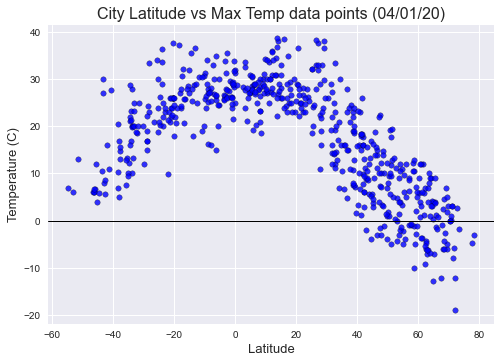

In [88]:
x = clean_city_data['lat'].values
y = clean_city_data['temp'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o",c='b', edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Max Temp data points (04/01/20)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Temperature (C)', fontsize=13)

plt.axhline(0, color='black', lw=1)

plt.show()


## Latitude vs. Humidity Plot

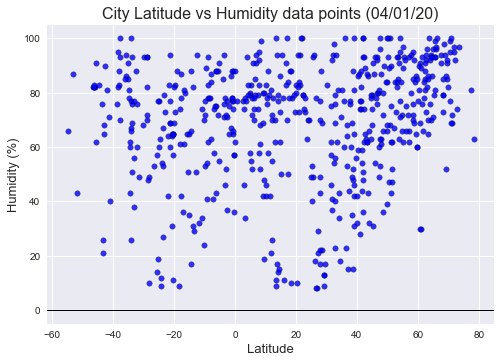

In [92]:
x = clean_city_data['lat'].values
y = clean_city_data['humidity'].values


plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o",c="b", edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Humidity data points (04/01/20)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Humidity (%)', fontsize=13)

plt.axhline(0, color='black', lw=1)

plt.show()

## Latitude vs. Cloudiness Plot

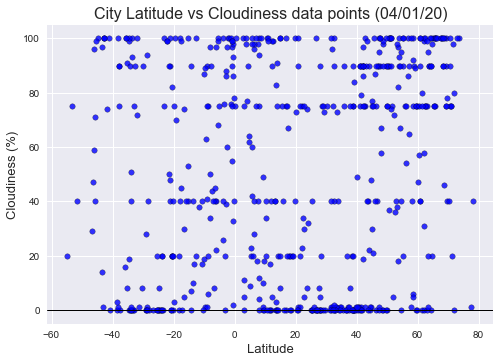

In [93]:
x = clean_city_data['lat'].values
y = clean_city_data['Cloudiness'].values


plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o",c="b", edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Cloudiness data points (04/01/20)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Cloudiness (%)', fontsize=13)

plt.axhline(0, color='black', lw=1)

plt.show()

## Latitude vs. Wind Speed Plot

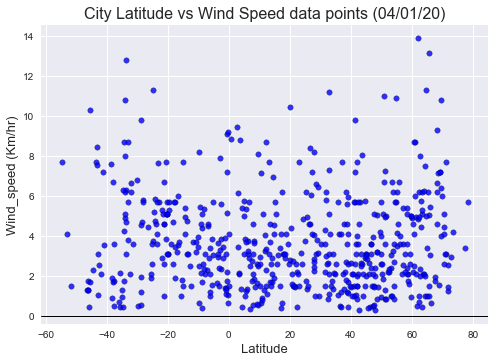

In [94]:
x = clean_city_data['lat'].values
y = clean_city_data['Wind_speed'].values


plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o",c="b", edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Wind Speed data points (04/01/20)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Wind_speed (Km/hr)', fontsize=13)

plt.axhline(0, color='black', lw=1)

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [87]:
from scipy import stats
from scipy.stats import linregress

In [89]:
clean_city_data = clean_city_data.dropna(how="any")

north_data =clean_city_data[clean_city_data['lat']>0]
south_data =clean_city_data[clean_city_data['lat']<0]

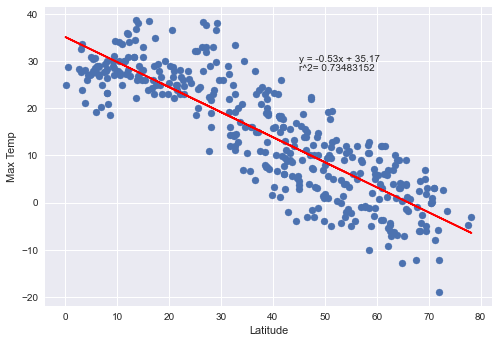

In [96]:
x_values = north_data['lat']
y_values = north_data['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(45,28))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

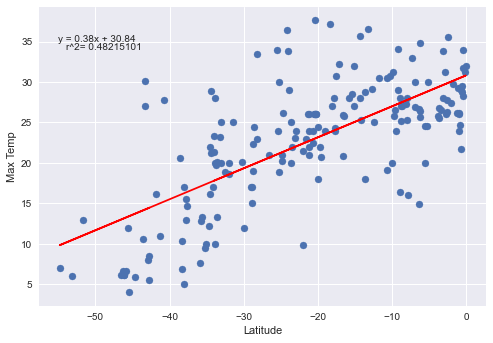

In [100]:
x_values = south_data['lat']
y_values = south_data['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(-54,34))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

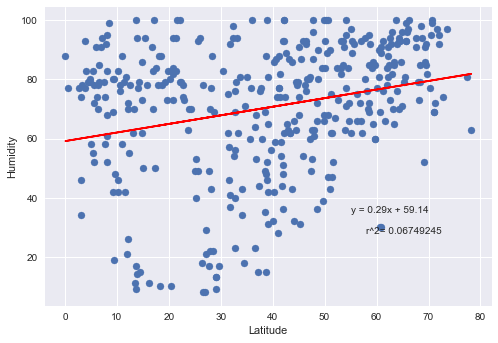

In [105]:
x_values = north_data['lat']
y_values = north_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,35))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(58,28))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

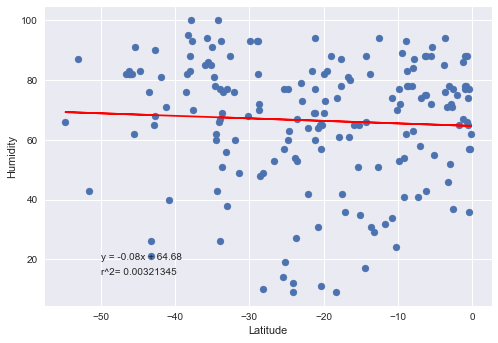

In [108]:
x_values = south_data['lat']
y_values = south_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(-50,15))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

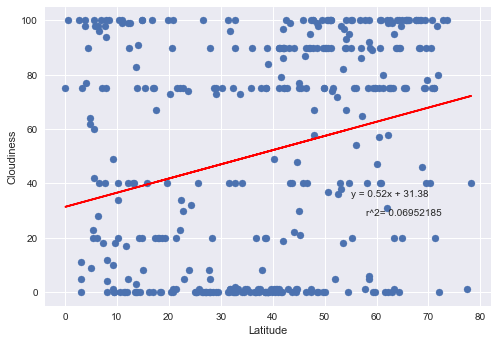

In [109]:
x_values = north_data['lat']
y_values = north_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,35))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(58,28))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

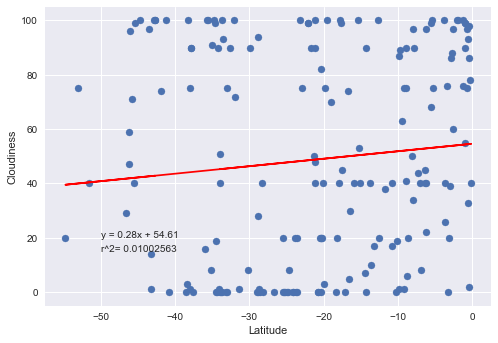

In [110]:
x_values = south_data['lat']
y_values = south_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(-50,15))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

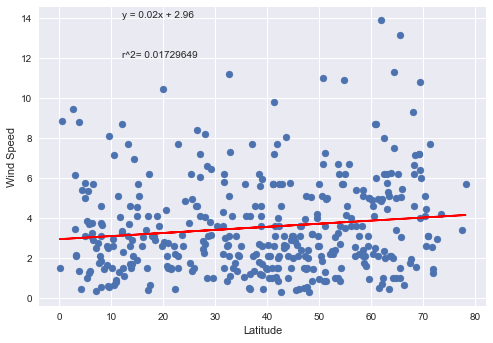

In [114]:
x_values = north_data['lat']
y_values = north_data['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,14))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(12,12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

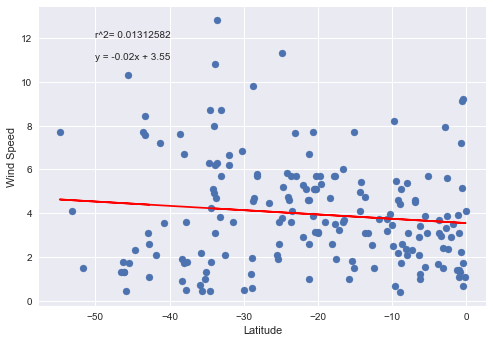

In [116]:
x_values = south_data['lat']
y_values = south_data['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(-50,12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()